In [215]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [186]:
# set configuration
sample_size, nr_sample, nr_moments = 50, 20, 2

# classificatio
test_size, cv = 0.5, 5
cv_config = [test_size, cv]

n_folds = 5

## Bounded distributions

In [187]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [188]:
moments_df = dem.get_moments(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,label
0,0.510991,0.118356,arcsine
1,0.454299,0.108368,arcsine
2,0.465282,0.118224,arcsine


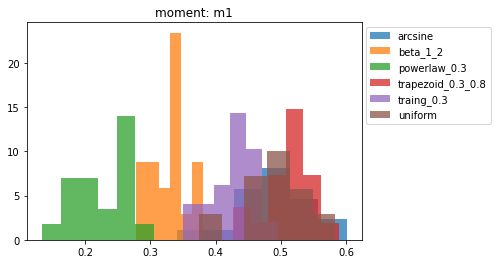

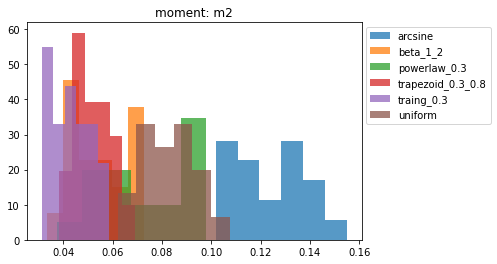

In [189]:
dem.get_histogram_of_moments(moments_df)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

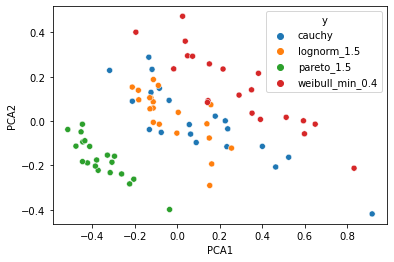

In [226]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2)
x_pca = pca.fit_transform(moments_df.iloc[:,:-1])

pca_res = pd.DataFrame(x_pca)
pca_res.columns=["PCA1","PCA2"]
pca_res['y']=moments_df['label']

sns.scatterplot(data=pca_res,x='PCA1',y='PCA2',hue='y')

In [196]:
# setting values for cross validation
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]
nr_moments_list = list(range(2,11))

### svm

In [197]:
res_svm = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample, n_folds, 1)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

In [201]:
res_svm.to_csv('results/moments/res_svm_bounded.csv')

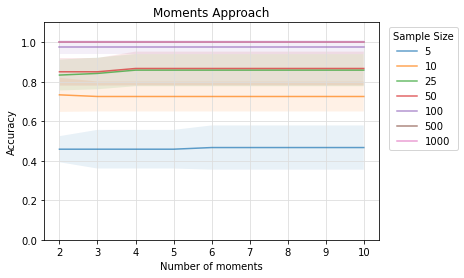

In [202]:
res_svm_ = res_svm.groupby(['nr_moments','sample_size'])['score'].agg(['mean','std']).reset_index().rename(columns={'mean':'acc', 'std':'std'})
cm.plot_cv_moments(res_svm_)

### Logistic Regression

In [204]:
res_lr = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample, n_folds, 2)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

In [205]:
res_lr.to_csv('results/moments/res_lr_bounded.csv')

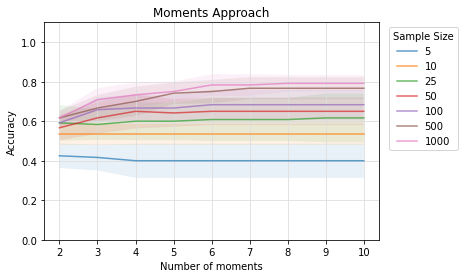

In [206]:
res_lr_ = res_lr.groupby(['nr_moments','sample_size'])['score'].agg(['mean','std']).reset_index().rename(columns={'mean':'acc', 'std':'std'})
cm.plot_cv_moments(res_lr_)

## Heavytail distributions

In [207]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = True)
#dm.plot_histograms_of_samples(heavytail_samples)

In [228]:
nr_moments=3
moments_df = dem.get_moments(heavytail_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,label
0,0.839413,0.355249,0.185491,cauchy
1,0.874340,0.749412,1.291102,cauchy
2,0.792648,0.439343,0.462312,cauchy


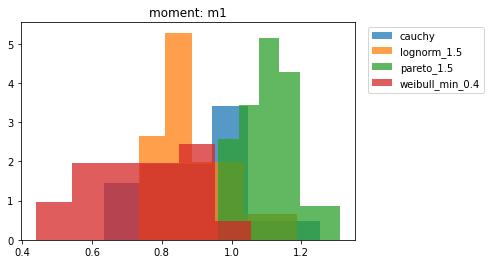

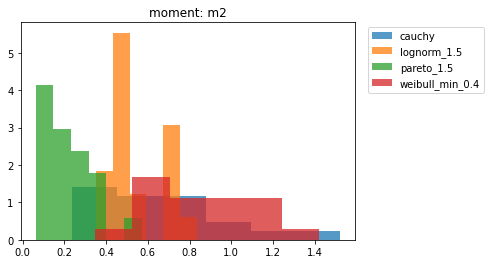

In [209]:
dem.get_histogram_of_moments(moments_df)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

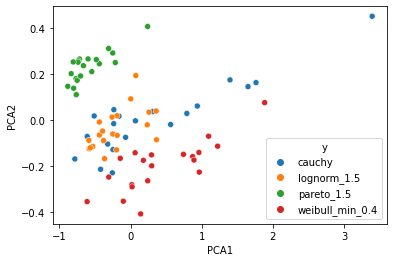

In [229]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(moments_df.iloc[:,:-1])

pca_res = pd.DataFrame(x_pca)
pca_res.columns=["PCA1","PCA2"]
pca_res['y']=moments_df['label']

sns.scatterplot(data=pca_res,x='PCA1',y='PCA2',hue='y')

### SVM

In [218]:
res_svm_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample, n_folds, 1, transform = True)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

In [219]:
res_svm_ht.to_csv('results/moments/res_svm_heavytail.csv')

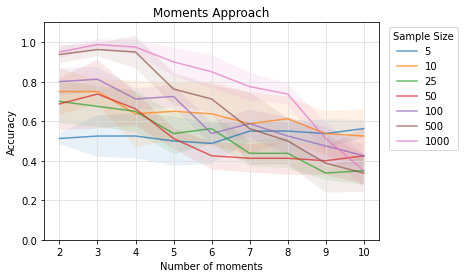

In [230]:
res_svm_ht_ = res_svm_ht.groupby(['nr_moments','sample_size'])['score'].agg(['mean','std']).reset_index().rename(columns={'mean':'acc', 'std':'std'})
cm.plot_cv_moments(res_svm_ht_)

### Logistic Regression

In [221]:
res_lr_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample, n_folds, 2, transform=True)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

In [222]:
res_lr_ht.to_csv('results/moments/res_lr_heavytail.csv')

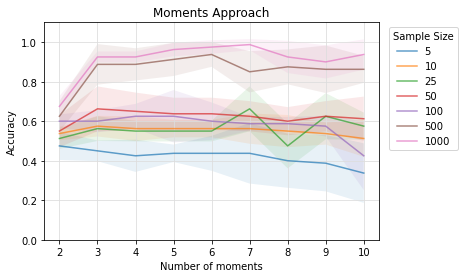

In [231]:
res_lr_ht_ = res_lr_ht.groupby(['nr_moments','sample_size'])['score'].agg(['mean','std']).reset_index().rename(columns={'mean':'acc', 'std':'std'})
cm.plot_cv_moments(res_lr_ht_)